(lecture12:the-normal)=
# The Normal distribution

The Normal (or Gaussian) distribution is a ubiquitous one.
It appears over and over again.
You must already have seen it when playing with the [Binomial](lecture09:the-binomial-distribution) or the [Poisson](lecture09:the-poisson-distribution).
There are two explanations as to why the Normal appears so often:

+ It is the distribution of maximum uncertainty that matches a known mean and a known variance variance.
This comes from the [principle of maximum entropy](https://en.wikipedia.org/wiki/Principle_of_maximum_entropy), a rather advanced concept that we are not going to deal with.
+ It is the distribution that arises when you sum up a lot of independent random variables together. This result is known as the [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem).

We write:

$$
X \sim N(\mu, \sigma^2),
$$

> $X$ follows a Normal distribution with mean $\mu$ and variance $\sigma^2$.

So, for $\mu=0$ and $\sigma^2=1$, we get the standard Normal.

The PDF is of $X$ is:

$$
p(x) := \frac{1}{\sqrt{2\pi}\sigma}\exp\left\{-\frac{(x-\mu)^2}{2\sigma^2}\right\}.
$$

The mean of $X$ is:

$$
\mathbf{E}[X] = \mu,
$$

and the variance is:

$$
\mathbf{V}[X] = \sigma^2.
$$

Of course, the standard deviation of $X$ is just $\sigma$.

Here is how to define a Normal variable in `scipy.stats`:

In [1]:
MAKE_BOOK_FIGURES=False

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

def set_book_style():
    plt.style.use('seaborn-v0_8-white') 
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings
        'font.family': 'serif',  # For academic publishing
        'font.size': 8,  # As requested, 10pt font
        'axes.labelsize': 8,
        'axes.titlesize': 8,
        'xtick.labelsize': 7,  # Slightly smaller for better readability
        'ytick.labelsize': 7,
        'legend.fontsize': 7,
        
        # Line and marker settings for consistency
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout to prevent clipped labels
        'figure.constrained_layout.use': True,
        
        # Default DPI (will override when saving)
        'figure.dpi': 600,
        'savefig.dpi': 600,
        
        # Despine - remove top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional trim settings
        'figure.autolayout': True,  # Alternative to constrained_layout
        'savefig.bbox': 'tight',    # Trim when saving
        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off
    })

def save_for_book(fig, filename, is_vector=True, **kwargs):
    """
    Save a figure with book-optimized settings.
    
    Parameters:
    -----------
    fig : matplotlib figure
        The figure to save
    filename : str
        Filename without extension
    is_vector : bool
        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.
    **kwargs : dict
        Additional kwargs to pass to savefig
    """    
    # Set appropriate DPI and format based on figure type
    if is_vector:
        dpi = 1000
        ext = '.pdf'
    else:
        dpi = 600
        ext = '.tif'
    
    # Save the figure with book settings
    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)


def make_full_width_fig():
    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)

def make_half_width_fig():
    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)

if MAKE_BOOK_FIGURES:
    set_book_style()
make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()
make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

import numpy as np
import scipy.stats as st

In [2]:
mu = 5.0
sigma = 2.0
X = st.norm(loc=mu, scale=sigma)

Here are some samples:

In [3]:
X.rvs(size=10)

array([3.70615469, 3.50432765, 5.81972225, 4.15723633, 3.55027162,
       6.28034751, 7.06861179, 5.88131433, 1.85878024, 5.31634181])

Here is the PDF of $X$:

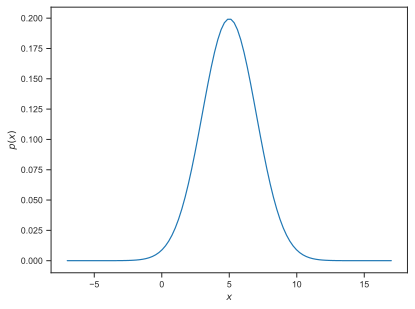

In [4]:
fig, ax = make_half_width_fig()
xs = np.linspace(mu - 6.0 * sigma, mu + 6.0 * sigma, 100)
ax.plot(xs, X.pdf(xs))
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
save_for_book(fig, 'ch12.fig4')

Notice that this is just a scaled version of of the standard Normal PDF:

$$
p(x) = \frac{1}{\sigma}\phi\left(\frac{x-\mu}{\sigma}\right). 
$$

So the PDF of $X$ is the same as the standard Normal but at a different scale.
This is a very useful observation as it allows us to prove the formula for the mean of $X$.
Indeed we have:

$$
\begin{split}
\mathbf{E}[X] &= \int_{-\infty}^{+\infty}x p(x)dx\\
&= \int_{-\infty}^{+\infty}x \frac{1}{\sigma}\phi\left(\frac{x-\mu}{\sigma}\right)dx.
\end{split}
$$

Change integration variable to $z = \frac{x-\mu}{\sigma}$, and you get:

$$
\begin{split}
\mathbf{E}[X] &= \int_{-\infty}^{+\infty}(\mu + \sigma z) \frac{1}{\sigma}\phi\left(z\right)\sigma dz\\
&= \int_{-\infty}^{+\infty}(\mu + \sigma z) \phi\left(z\right)dz\\
&= \mathbf{E}[\mu + \sigma Z]\\
&= \mu + \sigma \mathbf{E}[Z]\\
&= \mu,
\end{split}
$$

since $\mathbf{E}[Z]=0$.
Similarly, you can show that $\mathbf{V}[X] = \sigma^2$.

There is also a connection between the CDF of $X$, call it $F(x) = p(X\le x)$ and the CDF of the standard Normal $\Phi(z)$. It is:

$$
F(x) := p(X \le x) = \Phi\left(\frac{x-\mu}{\sigma}\right).
$$

We can formally prove this as follows:

$$
\begin{split}
F(x) &= \int_{-\infty}^xp(\tilde{x})d\tilde{x}\\
&= \int_{-\infty}^x \frac{1}{\sigma}\phi\left(\frac{\tilde{x}-\mu}{\sigma}\right) d\tilde{x}.
\end{split}
$$

Now change integration variable to $\tilde{z} = \frac{\tilde{x} - \mu}{\sigma}$.
We have that:

$$
\begin{split}
F(x) &= \int_{-\infty}^{\frac{x-\mu}{\sigma}} \frac{1}{\sigma} \exp\left\{-\frac{\tilde{z}^2}{2}\right\}\sigma d\tilde{z}\\
&= \int_{-\infty}^{\frac{x-\mu}{\sigma}} \phi(\tilde{z})\tilde{z}\\
&= \Phi\left(\frac{x-\mu}{\sigma}\right).
\end{split}
$$

Okay, so if you plot the CDF of $X$ it looks exactly like the CDF of the standard normal at a different scale.
Here it is:

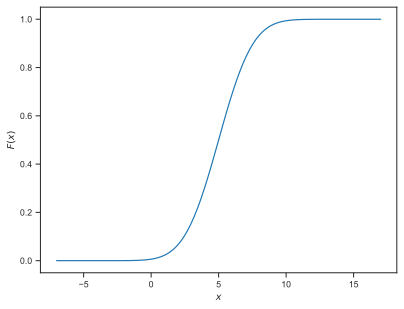

In [5]:
fig, ax = make_half_width_fig()
ax.plot(xs, X.cdf(xs))
ax.set_xlabel('$x$')
ax.set_ylabel('$F(x)$')
save_for_book(fig, 'ch12.fig5')